In [ ]:
#1.
#데이터셋’ 폴더의 CCTV_in_Seoul.csv, population_in_Seoul.csv를 이용, 
#pandas / numpy를 통해 아래와 같은 형태로 데이터를 정리해 볼 것. 
#'외국인비율’ = ‘외국인’ / ‘인구수’ * 100, ‘고령자비율’ = ‘고령자’ / ‘인구수’ * 100
#‘오차’ – l소계 – 회귀직선(인구수)l , 오차는 np.abs를 활용


#2
#(1)에서 정리한 데이터를 ‘오차’ 컬럼을 기준으로 색깔을 입혀서 시각화 해보고
#이를 통해 무엇을 파악할 수 있는지 주석으로 간략하게 1-2줄로 서술해보기. (plt.colormap, plt.text 로 컬러맵과 이름 추가)

In [2]:
import pandas as pd
import numpy as np
import os

In [3]:
#os.getcwd()
os.chdir(r"C:\Users\USER\Desktop\GH\Session 04. 파이썬 라이브러리 활용 기초\Session 04. 파이썬 라이브러리 활용 기초\데이터셋")
CCTV_Seoul = pd.read_csv('CCTV_in_Seoul.csv', encoding = 'utf-8') 

In [4]:
pop_Seoul = pd.read_excel('population_in_Seoul.xls', 
                          header = 2, usecols = 'B, D, G, J, N', encoding = 'utf-8')

In [5]:
pop_Seoul.rename(columns={pop_Seoul.columns[0] : '구별',
                                   pop_Seoul.columns[1] : '인구수',
                                   pop_Seoul.columns[2] : '한국인',
                                    pop_Seoul.columns[3] : '외국인',
                                    pop_Seoul.columns[4] : '고령자'}, inplace = True)

In [6]:
pop_Seoul['외국인비율'] = (pop_Seoul['외국인'] / pop_Seoul['인구수'] )* 100
pop_Seoul['고령자비율'] = (pop_Seoul['고령자'] / pop_Seoul['인구수'] )* 100

In [7]:
CCTV_Seoul.columns.values[0] = '구별'

In [8]:
CCTV_Seoul.소계

0     3238
1     1010
2      831
3      911
4     2109
5      878
6     1884
7     1348
8     1566
9      825
10    1870
11    1302
12     980
13    1254
14    2297
15    1327
16    1651
17    1081
18    2482
19    1277
20    2096
21    2108
22    1619
23    1023
24     916
Name: 소계, dtype: int64

In [9]:
data_result = pd.merge(CCTV_Seoul, pop_Seoul)
data_result.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,3238,1292,430,584,932,547453,542364,5089,67085,0.929578,12.254020
1,강동구,1010,379,99,155,377,431920,427573,4347,58770,1.006436,13.606686
2,강북구,831,369,120,138,204,322915,319164,3751,58196,1.161606,18.022080
3,강서구,911,388,258,184,81,603611,596949,6662,79660,1.103691,13.197241
4,관악구,2109,846,260,390,613,520040,501957,18083,72249,3.477233,13.892970


In [12]:
data_gangnam = data_result[data_result.구별=='강남구']
data_gangnam

,구별,소계,2013년도 이전,2014년,2015년,2016년,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,3238,1292,430,584,932,547453,542364,5089,67085,0.929578,12.25402


In [13]:
fp1 = np.polyfit(data_result['인구수'], data_result['소계'], 1)
f1 = np.poly1d(fp1)
data_result['오차'] = np.abs(f1(data_result['인구수']) -data_result['소계'])
df_sort = data_result.sort_values(by='오차', ascending=False)
df_sort = df_sort.reset_index(drop=True)
df_sort.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,인구수,한국인,외국인,고령자,외국인비율,고령자비율,오차
0,강남구,3238,1292,430,584,932,547453,542364,5089,67085,0.929578,12.254020,1566.538319
1,양천구,2482,1843,142,30,467,468145,464185,3960,58045,0.845892,12.398936,895.665104
2,강서구,911,388,258,184,81,603611,596949,6662,79660,1.103691,13.197241,820.739963
3,용산구,2096,1368,218,112,398,245090,228999,16091,37640,6.565343,15.357624,749.085528
4,서초구,2297,1406,157,336,398,438163,433951,4212,54751,0.961286,12.495578,742.846867


In [14]:
import matplotlib.pyplot as plt 
import platform     
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus']= False

if platform.system() == 'Darwin': #맥os 사용자
    rc('font', family = 'AppleGothic')
elif platform.system() == 'Windows':#윈도우 사용자
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)

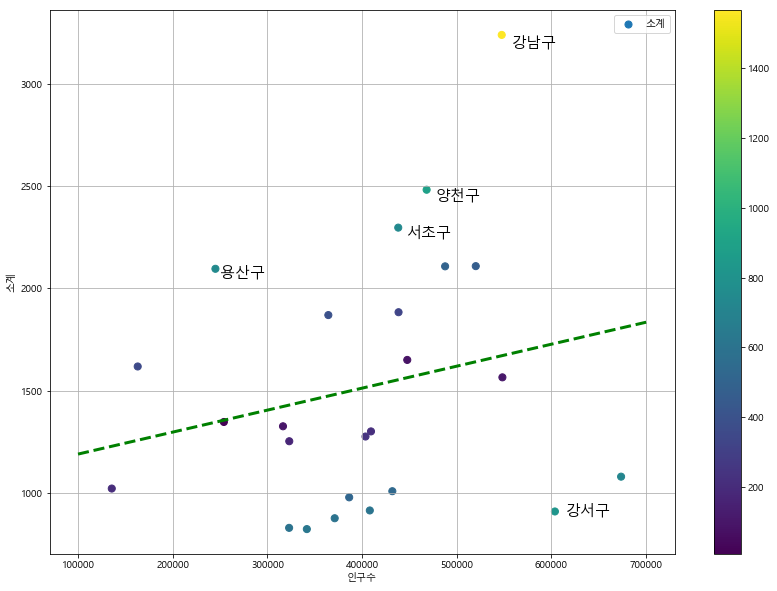

In [15]:
plt.figure(figsize=(14, 10))
colormap = data_result['오차']
plt.scatter(data_result['인구수'], data_result['소계'], c = colormap, s = 50)
fx = np.linspace(100000, 700000, 100)
plt.plot(fx, f1(fx), ls='dashed', lw=3, color='g')
 

for n in range(5):
    plt.text(df_sort['인구수'][n]*1.02, df_sort['소계'][n]*0.98,
            df_sort['구별'][n], fontsize=15)
 
plt.xlabel('인구수')
plt.ylabel('소계')
plt.colorbar()
plt.legend()
plt.grid()
plt.show()
